In [1385]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from matplotlib.colors import LogNorm,Normalize
import seaborn as sns
from matplotlib import rc
import scipy.interpolate as interp

In [1386]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [1387]:
def get_density(vals, bins=30, kind="linear"):
    y, bin_edges = np.histogram(vals, bins=bins, density=True)
    x = (bin_edges[1:] + bin_edges[:-1])/2.
    f = interp.interp1d(x, y, kind=kind, fill_value="extrapolate")
    return f(vals)

In [1388]:
bin_fle = pd.read_csv('tzpz_bin_data.csv',sep=' ')

### $\color{blue}{0.}$ THE BIN DATA BELOW IS AFTER APPLYING $|COR\_val|<1.5$ CUT
## Table $\color{blue}{1}$

In [1389]:
bin_fle

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.05,510,0.076863,0.085455,18,0.219213,0.080078,0.035294,0.128819
1,0.15,1417,0.163771,0.169205,55,0.265172,0.163151,0.038814,0.087711
2,0.25,5062,0.252976,0.259735,203,0.422421,0.260562,0.040103,0.128402
3,0.35,6087,0.353510,0.362201,340,0.440004,0.352839,0.055857,0.064431
4,0.45,7043,0.450704,0.435872,494,0.340796,0.465696,0.070141,-0.085216
5,0.55,6672,0.551808,0.542557,237,0.318647,0.530775,0.035522,-0.138576
6,0.65,6908,0.647815,0.647109,12,0.777474,0.651017,0.001737,0.076593
7,0.75,7782,0.750480,0.753455,35,0.869637,0.754731,0.004498,0.065483
8,0.85,6535,0.848409,0.845089,55,0.787105,0.855449,0.008416,-0.036834
9,0.95,6103,0.947165,0.946239,43,1.208204,0.962008,0.007046,0.125482


In [1390]:
red = pd.read_csv('tzpz_plotting_data_COR_red.csv',sep=' ')
grey= pd.read_csv('tzpz_plotting_data_COR_gray.csv',sep=' ')

In [1391]:
red.columns = ['z_phot','z_true','COR_val']
red = red[['z_true','z_phot','COR_val']]

In [1392]:
# Sorting by z_true value
red = red.sort_values('z_true')
grey = grey.sort_values('z_true')

In [1393]:
print(len(grey),'\n',len(red))

89621 
 3478


In [1394]:
red.head(1)

,z_true,z_phot,COR_val
0,0.014823,0.252435,-0.237612


In [1395]:
grey.head(1)

,z_true,z_phot,COR_val
0,0.014823,0.252435,-0.237612


Text(0.5, 1.0, 'Red Data')

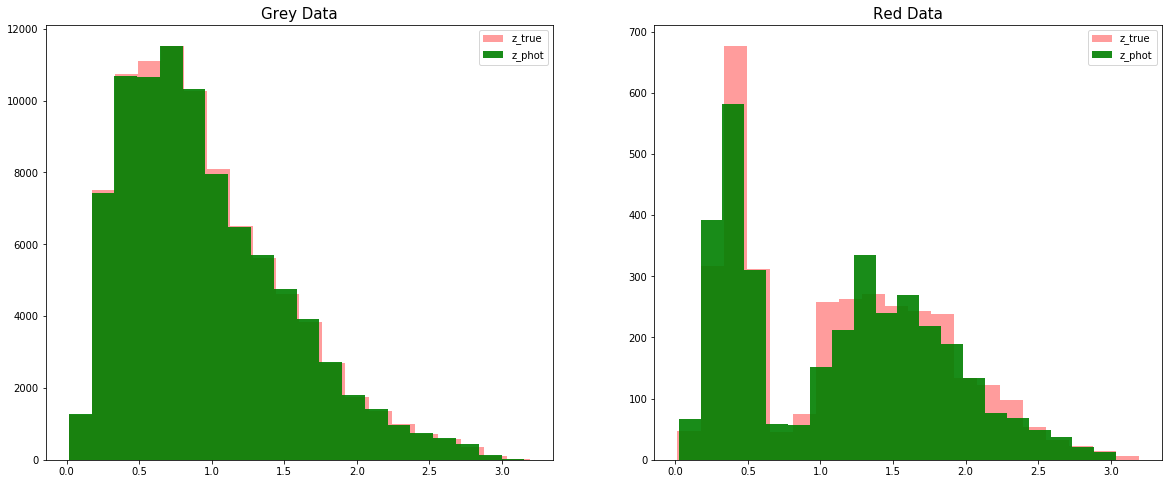

In [1396]:
plt.rcParams['figure.figsize'] = [20,8]
plt.subplot(1,2,1)
plt.hist(grey['z_true'],bins=20,alpha=0.39,color='r',label='z_true')
plt.hist(grey['z_phot'],alpha=0.9,bins=20,color='green',label='z_phot');
plt.title('Grey Data',fontsize=15)
plt.legend()
plt.subplot(1,2,2)
plt.hist(red['z_true'],bins=20,alpha=0.39,color='r',label='z_true')
plt.hist(red['z_phot'],alpha=0.9,bins=20,color='green',label='z_phot');
plt.legend()
plt.title('Red Data',fontsize=15)

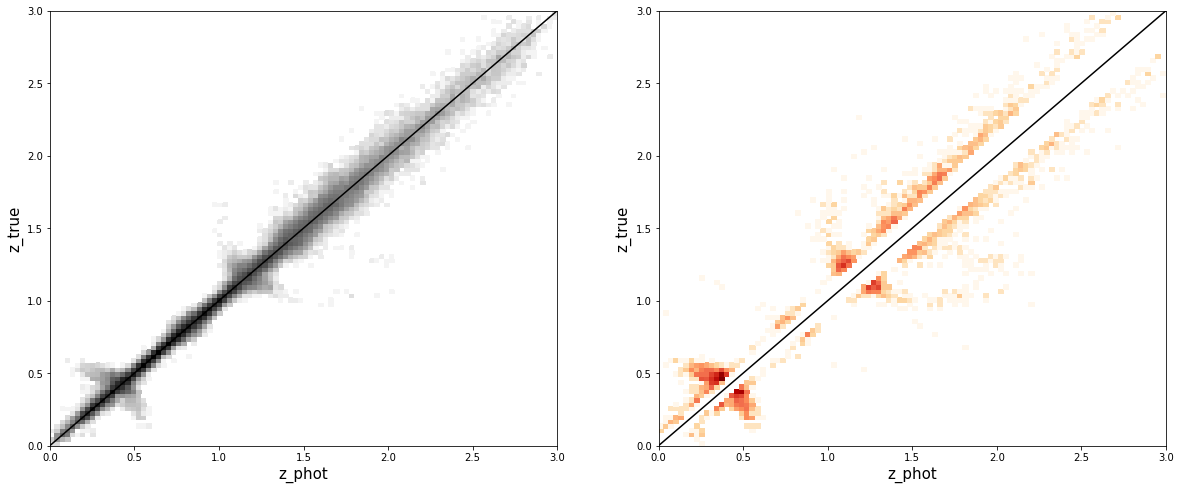

In [1397]:
plt.rcParams['figure.figsize'] = [20,8] 
plt.subplot(1,2,1)
tx = np.where( grey.z_phot > 0.0 )[0]

plt.hist2d( grey.z_phot[tx], grey.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,3.0],[0.0,3.0],color='black')

plt.subplot(1,2,2)
tx = np.where( red.z_phot > 0.0 )[0]
plt.hist2d( red.z_phot[tx], red.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='OrRd');

#plt.plot(red.z_phot,red.z_true,'o',c='r',alpha=0.5)
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,3.0],[0.0,3.0],color='black')

## $\color{blue}{1}$. Now we will chop off the data files, keeping only points within the range : $\color{red}{z\_true = [0, 1.2]}$

In [1398]:
red = red[red['z_true']<=1.2]
grey = grey[grey['z_true']<=1.2]

In [1399]:
print(len(grey),'\n',len(red))

63524 
 1788


Text(0.5, 1.0, 'Red Data')

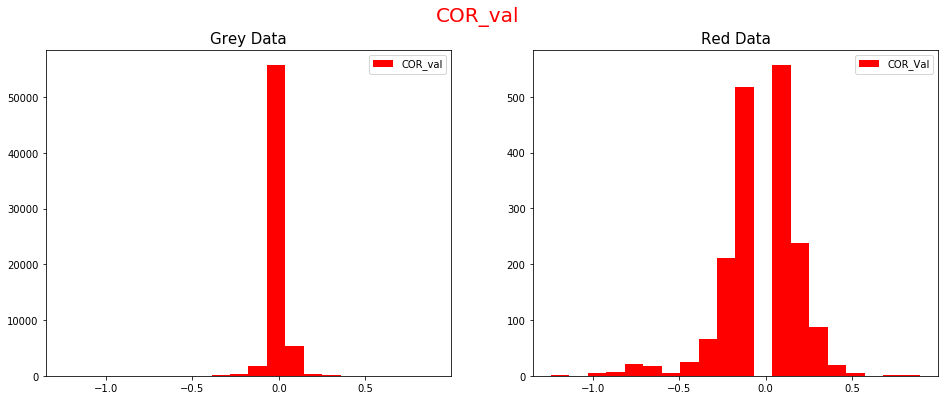

In [1400]:
plt.rcParams['figure.figsize'] = [16,6]
plt.subplot(1,2,1)
plt.hist(grey['z_true']-grey['z_phot'],bins=20,color='r',label='COR_val')
plt.title('Grey Data',fontsize=15)
plt.suptitle('COR_val',fontsize=20,color='red')
plt.legend()
plt.subplot(1,2,2)
plt.hist(red['z_true']-red['z_phot'],bins=20,color='r',label='COR_Val')
plt.legend()
plt.title('Red Data',fontsize=15)

Text(0.5, 1.0, 'Red Data')

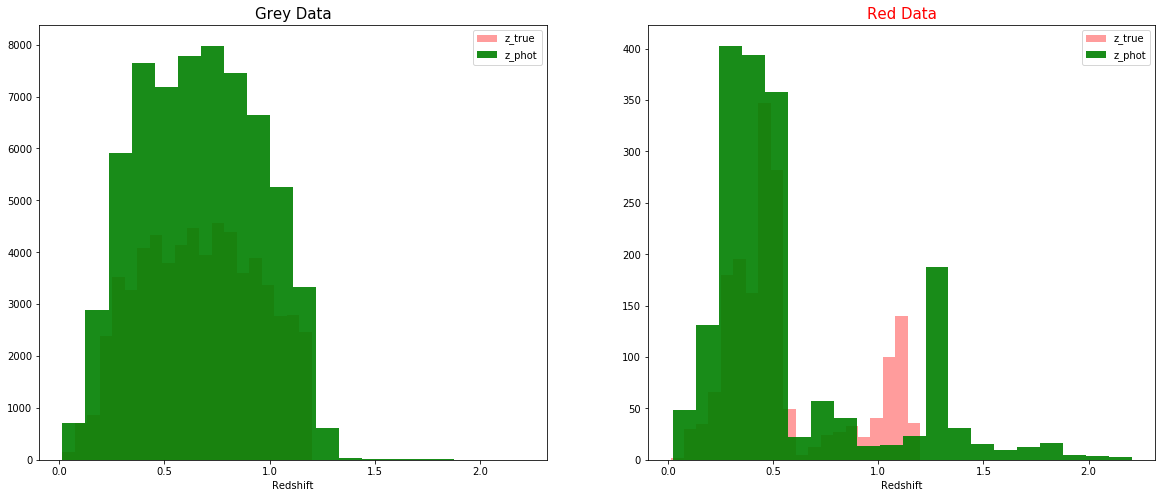

In [1401]:
plt.rcParams['figure.figsize'] = [20,8]
plt.subplot(1,2,1)
plt.hist(grey['z_true'],bins=20,alpha=0.39,color='r',label='z_true')
plt.hist(grey['z_phot'],alpha=0.9,bins=20,color='green',label='z_phot');
plt.title('Grey Data',fontsize=15)
plt.legend()
plt.xlabel('Redshift')
plt.subplot(1,2,2)
plt.hist(red['z_true'],bins=20,alpha=0.39,color='r',label='z_true')
plt.hist(red['z_phot'],alpha=0.9,bins=20,color='green',label='z_phot');
plt.legend()
plt.xlabel('Redshift')
plt.title('Red Data',fontsize=15,color='r')

(0, 1.2)

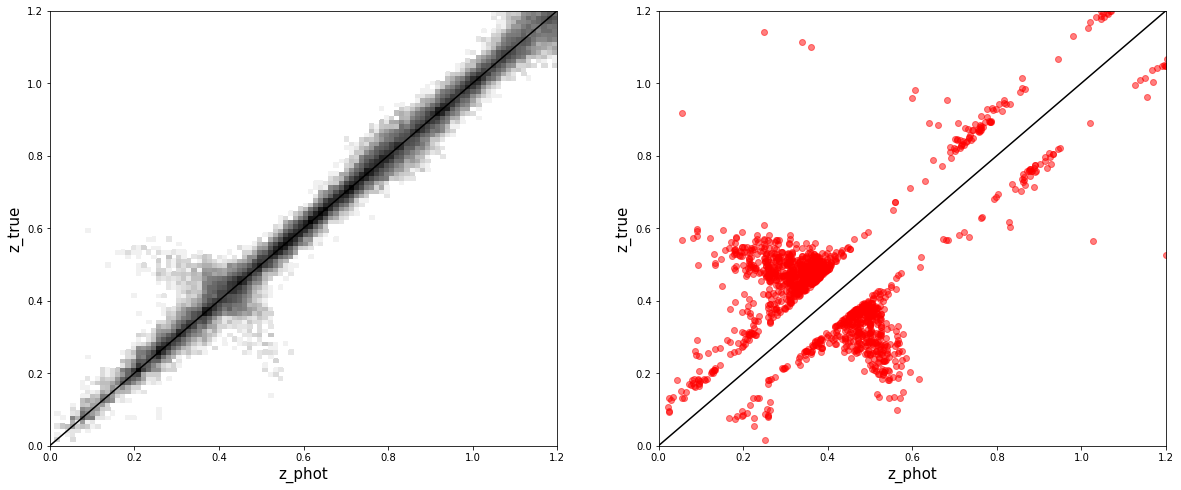

In [1402]:
plt.rcParams['figure.figsize'] = [20,8] 
plt.subplot(1,2,1)
tx = np.where( grey.z_phot > 0.0 )[0]

plt.hist2d( grey.z_phot[tx], grey.z_true[tx], bins=100, range=[[0.0,1.2],[0.0,1.2]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,1.2],[0.0,1.2],color='black')

plt.subplot(1,2,2)
txx = np.where( red.z_phot > 0.0 )[0]
plt.plot([0.0,1.2],[0.0,1.2],color='black')
plt.plot(red.z_phot,red.z_true,'o',c='r',alpha=0.5)
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.xlim(0,1.2)
plt.ylim(0,1.2)

### The above plots are forced within the axes limits of $[0, 1.2]$. It doesn't capture the full image. We can see that although we have refined the dataset, $z_{spectro} \le 1.2$ , the $photo\_z$ values well exced the $1.2$ range. This can be seen from the summary statistics described below.  We also see that $\color{red}{COR\_val}$ is unable to screen off such candidates

### Summary Statistics of the two datasets. Specially to check the <font color='red'>min</font>  and <font color='blue'>max</font>  values of the photo_z column.

In [1403]:
print('Grey                                   Red')
display_side_by_side(grey.describe(),red.describe())

Grey                                   Red


,z_true,z_phot,COR_val
count,63524.000000,63524.000000,63524.000000
mean,0.668945,0.669555,-0.000611
std,0.279596,0.285787,0.048215
min,0.014823,0.014874,-1.242432
25%,0.441927,0.436160,-0.014416
50%,0.667531,0.665853,0.000409
75%,0.893365,0.892968,0.015576
max,1.199976,2.207569,0.892143
,z_true,z_phot,COR_val
count,1788.000000,1788.000000,1788.000000


#### Checking the corresponding $z\_spectro$ value of the maximum $z\_photo$ value

In [1404]:
red.loc[red['z_phot'] == np.max(red['z_phot'])] # 2.207569

,z_true,z_phot,COR_val
1471,0.965137,2.207569,-1.242432


#### Plotting the above maximum point

Text(1.45, 0.4, '$\\Delta f(z\\_photo>1.2)\\sim0.17$')

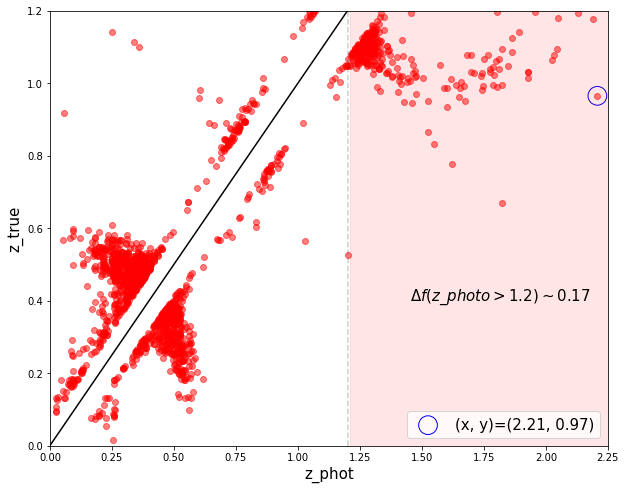

In [1405]:
fr = len(red[red['z_phot']>1.2001])/len(red['z_phot'])
x = red.loc[red['z_phot'] == np.max(red['z_phot'])].z_phot
y = red.loc[red['z_phot'] == np.max(red['z_phot'])].z_true
plt.rcParams['figure.figsize'] = [10,8]
plt.axvspan(1.21, 2.25, alpha=0.1, color='red')
txx = np.where( red.z_phot > 0.0 )[0]
plt.plot([0.0,1.2],[0.0,1.2],color='black')
plt.plot(red.z_phot,red.z_true,'o',c='r',alpha=0.5)
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.scatter(x,y,s=350,facecolors='none', edgecolors='b',label = '(x, y)=(%.2f, %.2f)'%(x,y))
plt.xlim(0,2.25)
plt.ylim(0,1.2)
plt.legend(fontsize=15)
plt.axvline(1.2,linestyle='--',color='black',alpha=0.2)
plt.text(1.45,0.4,r'$\Delta f(z\_photo>1.2)\sim%.2f$'%(fr),fontsize=15)

# Figure 7 : $|COR\_val<1.5| + z\_true<=1.2$

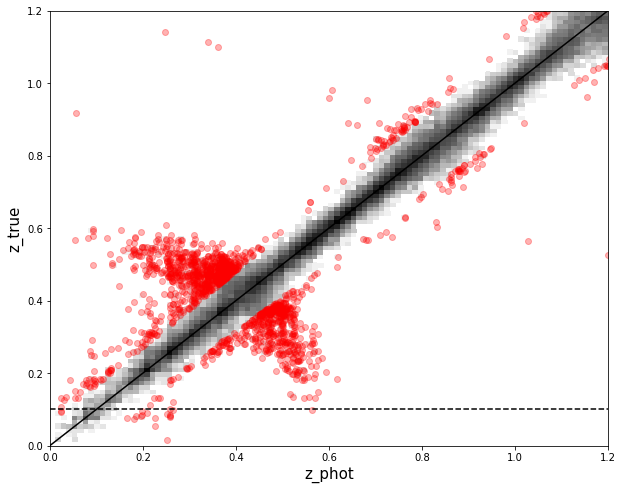

In [1406]:
gey = np.array(grey)
gey[: , 1]
tx = np.where( gey[: , 1] > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 

plt.hist2d( gey[:, 1][tx], gey[:, 0][tx], bins=100, range=[[0.0,1.2],[0.0,1.2]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(red.z_phot,red.z_true,'o',alpha=0.3,c='r')
plt.plot([0.0,1.2],[0.0,1.2],color='black')
#plt.xlim(0.,1.25)
#plt.ylim(0.0,1.25)
plt.axhline(0.1,linestyle='--',color='black')

In [1407]:
# Binning the data to compute the mean redshifts per bin and the no. of candidates
bins = np.linspace(0,1.2,13)
label = np.linspace(0.05,1.15,12)


# Calling the 'tzpz_main_points' file and extracting pts < 1.5 COR
bb = grey.iloc[:, :2]


bb['bin_z'] = pd.cut(bb.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_main = bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).mean()
tzpz_main.columns = ['z_true_mean','z_phot_mean']
tzpz_main.reset_index(drop=True, inplace=True)
#tzpz_main_points = tzpz_main
tzpz_main =  pd.concat([tzpz_main,N],axis=1,ignore_index=True)
tzpz_main =  pd.concat([tzpz_main,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_main.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_main = tzpz_main[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_main = tzpz_main.iloc[0:12 , : ]
#tzpz_main = tzpz_main.sort_values('z_true_mean')  
#tzpz_main

In [1408]:
bins = np.linspace(0,1.2,13)
label = np.linspace(0.05,1.15,12)
tzpz_out_COR = red
tzpz_out_COR = tzpz_out_COR[['z_phot','z_true','COR_val']]
tzpz_out_COR['bin_z'] = pd.cut(tzpz_out_COR.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)
tzpz_out_COR = tzpz_out_COR.drop(['COR_val'],axis=1)

tzpz_outt = tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).mean()
tzpz_outt.columns = ['z_true_mean','z_phot_mean']
tzpz_outt.reset_index(drop=True, inplace=True)
tzpz_outt =  pd.concat([tzpz_outt,N],axis=1,ignore_index=True)
tzpz_outt =  pd.concat([tzpz_outt,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_outt.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_outt = tzpz_outt[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_outt = tzpz_outt.iloc[0:12 , :]
#tzpz_outt = tzpz_outt.sort_values('z_true_mean')  
tzpz_outt['f_out'] = tzpz_outt.N/(tzpz_main.N)
#tzpz_outt

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [1409]:
test = pd.concat([tzpz_main,tzpz_outt.iloc[: , 1:]],axis=1)
test.columns = ['Bin','N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R','fout']
test['COR_Outlier_Bias'] = (test.z_true_mean_R - test.z_phot_mean_R)/(1+test.z_phot_mean_R)

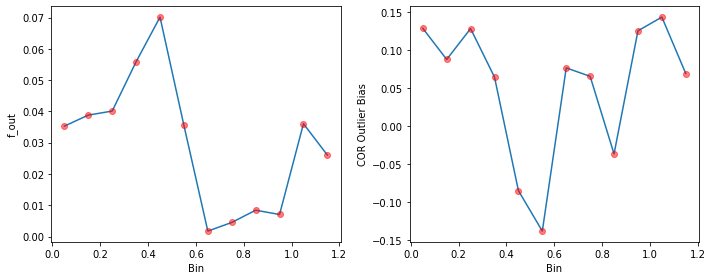

In [1410]:
plt.rcParams['figure.figsize'] = [10,4]
plt.subplot(1,2,1)
plt.plot(test.Bin,test.fout)
plt.plot(test.Bin,test.fout,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('f_out')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(test.Bin,test.COR_Outlier_Bias)
plt.plot(test.Bin,test.COR_Outlier_Bias,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('COR Outlier Bias')
plt.tight_layout()

### Binning results with $\color{red}{|COR\_val|<1.5 + z\_true<=1.2}$. The previous result is on the top of the notebook in section $\color{blue}{0.}$
## Table $\color{blue}{2}$

In [1411]:
test

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.05,510,0.076863,0.085455,18,0.219213,0.080078,0.035294,0.128819
1,0.15,1417,0.163771,0.169205,55,0.265172,0.163151,0.038814,0.087711
2,0.25,5062,0.252976,0.259735,203,0.422421,0.260562,0.040103,0.128402
3,0.35,6087,0.353510,0.362201,340,0.440004,0.352839,0.055857,0.064431
4,0.45,7043,0.450704,0.435872,494,0.340796,0.465696,0.070141,-0.085216
5,0.55,6672,0.551808,0.542557,237,0.318647,0.530775,0.035522,-0.138576
6,0.65,6908,0.647815,0.647109,12,0.777474,0.651017,0.001737,0.076593
7,0.75,7782,0.750480,0.753455,35,0.869637,0.754731,0.004498,0.065483
8,0.85,6535,0.848409,0.845089,55,0.787105,0.855449,0.008416,-0.036834
9,0.95,6103,0.947165,0.946239,43,1.208204,0.962008,0.007046,0.125482


# Figure 9
### Comparing the binning result with the previous result of $\color{red}{|COR\_val|<1.5}$ (Table $1$).

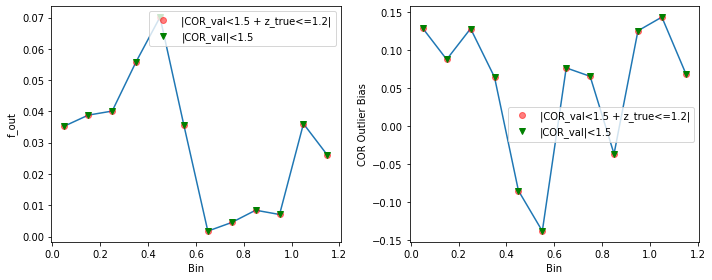

In [1412]:
plt.rcParams['figure.figsize'] = [10,4]
plt.subplot(1,2,1)
plt.plot(test.Bin,test.fout)
plt.plot(test.Bin,test.fout,'o',c='r',alpha=0.5,label='|COR_val<1.5| + z_true<=1.2')
plt.plot(bin_fle.Bin,bin_fle.fout,'v',c='g',label='|COR_val|<1.5')
plt.xlabel('Bin')
plt.ylabel('f_out')
plt.tight_layout()
plt.legend()
plt.subplot(1,2,2)
plt.plot(test.Bin,test.COR_Outlier_Bias)
plt.plot(test.Bin,test.COR_Outlier_Bias,'o',c='r',alpha=0.5,label='|COR_val<1.5 + z_true<=1.2|')
plt.plot(bin_fle.Bin,bin_fle.COR_Outlier_Bias,'v',c='g',label='|COR_val|<1.5')
plt.xlabel('Bin')
plt.ylabel('COR Outlier Bias')
plt.legend()
plt.tight_layout()

## $\color{blue}{2}$. Further Refining out points, based on $z\_photo$ condition.  $\color{red}{z\_phot\le1.2}$ are kept i.e. The points belonging to the pink region in the above plot are no more considered. The plot above shows that there is $\sim17\%$ of $photo\_z$ candidates lying in this pink zone.
#### If we instead directly jumped to this step, we find that it is insufficient to flag off spectroscopic redshift $ > 1.2$. The image below shows it, when we directly did this step from the original file, skipping step 1.

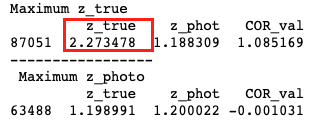

In [1413]:
Image(filename='p1.png')

In [1414]:
red = red[red['z_phot']<=1.2001]
grey = grey[grey['z_phot']<=1.2001]

In [1415]:
print('Grey                                     Red')
display_side_by_side(grey.describe(),red.describe())

Grey                                     Red


,z_true,z_phot,COR_val
count,62410.000000,62410.000000,62410.000000
mean,0.660601,0.658791,0.001810
std,0.274841,0.276081,0.039154
min,0.014823,0.014874,-0.465720
25%,0.437672,0.432958,-0.013359
50%,0.658737,0.657177,0.000842
75%,0.879968,0.879237,0.015946
max,1.199952,1.200022,0.892143
,z_true,z_phot,COR_val
count,1492.000000,1492.000000,1492.000000


#### The problem shown in the image above, with high z_spectro is cleared, by applying the two steps $(\color{blue}{1, 2})$ of refining together  as can be seen from the statistics below 

In [1416]:
print('Grey ')
print('Maximum z_true')
print(grey.loc[grey['z_true'] == np.max(grey['z_true'])] )
print('-----------------\n Maximum z_photo')
print(grey.loc[grey['z_phot'] == np.max(grey['z_phot'])] )

Grey 
Maximum z_true
         z_true    z_phot   COR_val
63522  1.199952  1.173079  0.026873
-----------------
 Maximum z_photo
         z_true    z_phot   COR_val
63488  1.198991  1.200022 -0.001031


In [1417]:
print('Red ')
print('Maximum z_true')
print(red.loc[red['z_true'] == np.max(red['z_true'])] )
print('-----------------\n Maximum z_photo')
print(red.loc[red['z_phot'] == np.max(red['z_phot'])] )

Red 
Maximum z_true
        z_true   z_phot   COR_val
1787  1.199801  1.06668  0.133121
-----------------
 Maximum z_photo
        z_true    z_phot   COR_val
1536  1.046264  1.199378 -0.153114


# Figure 10 : $|COR\_val<1.5| + z\_true\le1.2 + z\_photo\le1.2$

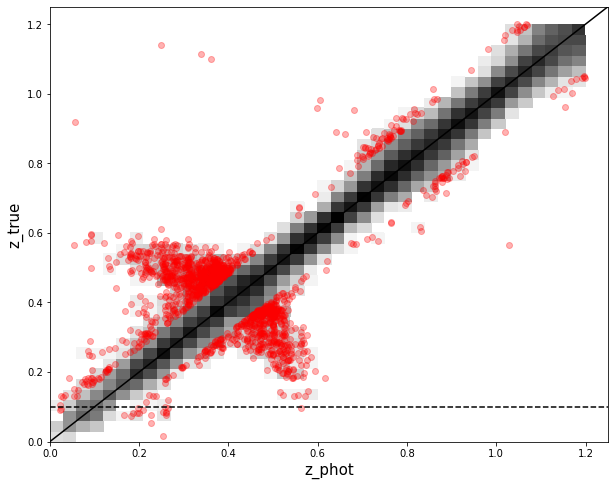

In [1418]:
gey = np.array(grey)
gey[: , 1]
tx = np.where( gey[: , 1] > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 

plt.hist2d( gey[:, 1][tx], gey[:, 0][tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(red.z_phot,red.z_true,'o',alpha=0.3,c='r')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
plt.xlim(0.,1.25)
plt.ylim(0.0,1.25)
plt.axhline(0.1,linestyle='--',color='black')

In [1419]:
grey

,z_true,z_phot,COR_val
0,0.014823,0.252435,-0.237612
1,0.017027,0.055589,-0.038562
2,0.017182,0.022209,-0.005027
3,0.017908,0.020425,-0.002517
4,0.018077,0.023789,-0.005712
...,...,...,...
63516,1.199851,1.196904,0.002947
63518,1.199864,1.155051,0.044813
63519,1.199895,1.171987,0.027908
63521,1.199947,1.107675,0.092272


In [1420]:
red

,z_true,z_phot,COR_val
0,0.014823,0.252435,-0.237612
1,0.054330,0.226088,-0.171758
2,0.074497,0.181479,-0.106982
3,0.076064,0.166868,-0.090804
4,0.077523,0.226575,-0.149052
...,...,...,...
1778,1.192452,1.061031,0.131421
1782,1.194572,1.050571,0.144001
1785,1.198653,1.069437,0.129216
1786,1.198965,1.046184,0.152781


In [1421]:
grey = grey.drop(['COR_val'],axis =1)
red = red.drop(['COR_val'],axis =1)

In [1422]:
red.to_csv('tzpz_plotting_data_COR_QUALITY_CUT_red.csv',sep=' ',index=False)
grey.to_csv('tzpz_plotting_data_COR_QUALITY_CUT_grey.csv',sep=' ',index=False)